Predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.

In [33]:
# Importing helpful package to load and hadle our data
import pandas as pd
import numpy as np

# import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Inline Priting of Visualizations
sns.set()
%matplotlib inline

# flexible and easy-to-use missing data visualizations
import missingno as msno

#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Import data
#  Get data
bank_data = pd.read_csv('bank.csv')
# Get glimpse of data
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [35]:
# Combine similar jobs into categiroes
# https://www.linkedin.com/pulse/whats-types-collar-workers-hassan-choughari
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3888,35,white-collar,married,tertiary,no,2717,no,no,cellular,13,aug,394,6,-1,0,unknown,yes
10736,44,blue-collar,married,primary,no,112,yes,no,unknown,14,may,225,2,-1,0,unknown,no
3202,35,self-employed,single,tertiary,no,353,no,no,cellular,11,feb,352,1,183,1,success,yes
882,30,self-employed,married,tertiary,no,1785,no,no,unknown,17,oct,235,1,-1,0,unknown,yes
2407,34,blue-collar,single,primary,no,79,no,no,telephone,10,jul,336,4,-1,0,unknown,yes
5527,65,other,divorced,secondary,no,744,no,no,cellular,5,jul,182,1,-1,0,unknown,no
3336,36,white-collar,married,tertiary,no,495,no,no,cellular,12,mar,213,3,182,6,success,yes
5469,50,technician,married,tertiary,no,3117,no,no,cellular,20,nov,44,2,164,1,failure,no
4642,42,other,married,secondary,no,1289,no,no,cellular,15,jul,250,4,415,2,failure,yes
8190,35,white-collar,single,tertiary,no,2306,no,no,cellular,18,aug,86,7,-1,0,unknown,no


# Binary Encoding on categorical data

BInary Encoding: first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

In [36]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['job','marital','education','default','housing','loan','contact','month','poutcome'])
encoded_bank_data = encoder.fit_transform(bank_data)
encoded_bank_data.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,marital_2,education_0,education_1,education_2,...,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous,deposit
0,0,0,0,1,0,0,1,0,0,1,...,0,1,59,2343,5,1042,1,-1,0,yes
1,0,0,0,1,0,0,1,0,0,1,...,0,1,56,45,5,1467,1,-1,0,yes
2,0,0,1,0,0,0,1,0,0,1,...,0,1,41,1270,5,1389,1,-1,0,yes
3,0,0,1,1,0,0,1,0,0,1,...,0,1,55,2476,5,579,1,-1,0,yes
4,0,0,0,1,0,0,1,0,1,0,...,0,1,54,184,5,673,2,-1,0,yes


In [37]:
ohe_encoder = pd.get_dummies(bank_data,
                             columns=['job','marital','education','default','housing','loan','contact','month','poutcome'],
                             prefix=['job','marital','education','default','housing','loan','contact','month','poutcome'])
cols = ohe_encoder.columns
ohe_encoder.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1


OHE give 47 columns where as binary gives 35 columns

In [38]:
bank_data['deposit'] = bank_data['deposit'].map({'yes':1, 'no':0})

In [39]:
# bank_data['deposit']
encoded_bank_data['deposit'] = bank_data['deposit']
encoded_bank_data.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,marital_2,education_0,education_1,education_2,...,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous,deposit
0,0,0,0,1,0,0,1,0,0,1,...,0,1,59,2343,5,1042,1,-1,0,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,56,45,5,1467,1,-1,0,1
2,0,0,1,0,0,0,1,0,0,1,...,0,1,41,1270,5,1389,1,-1,0,1
3,0,0,1,1,0,0,1,0,0,1,...,0,1,55,2476,5,579,1,-1,0,1
4,0,0,0,1,0,0,1,0,1,0,...,0,1,54,184,5,673,2,-1,0,1


In [40]:
# Save encoded_bank_data back to  csv file for future testing with more algorithms
encoded_bank_data.to_csv('cleaned_bank_df.csv',index=False)

In [41]:
encoded_bank_data.describe()

,job_0,job_1,job_2,job_3,marital_0,marital_1,marital_2,education_0,education_1,education_2,...,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous,deposit
count,11162.0,11162.000000,11162.00000,11162.000000,11162.0,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.0,0.380039,0.33623,0.667085,0.0,0.431016,0.684824,0.044526,0.464881,0.624978,...,0.158126,0.855940,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,0.0,0.485418,0.47244,0.471278,0.0,0.495241,0.464607,0.206270,0.498787,0.484150,...,0.364875,0.351166,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,0.0,0.000000,0.00000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


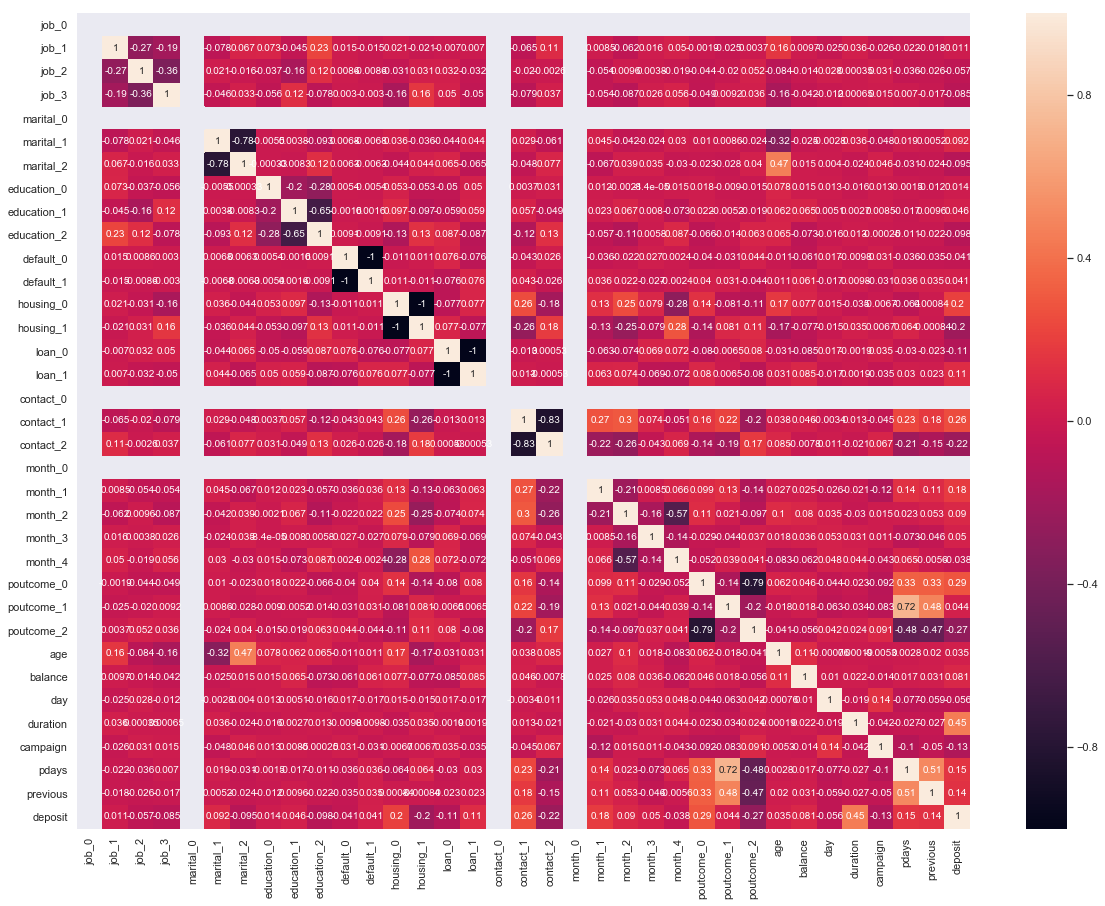

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(encoded_bank_data.corr(),annot=True,ax=ax)
plt.show()

In [43]:
sc_X = StandardScaler()
numerical = pd.DataFrame(sc_X.fit_transform(encoded_bank_data[['age','balance','day','duration']]), 
                         columns=['age','balance','day','duration'], 
                         index=encoded_bank_data.index)

In [44]:
numerical.head()

,age,balance,day,duration
0,1.491505,0.252525,-1.265746,1.930226
1,1.239676,-0.459974,-1.265746,3.154612
2,-0.019470,-0.080160,-1.265746,2.929901
3,1.155733,0.293762,-1.265746,0.596366
4,1.071790,-0.416876,-1.265746,0.867171


In [45]:
bank_scaled_clean_data = encoded_bank_data.copy(deep=True)
bank_scaled_clean_data[['age','balance','day','duration']] = numerical[['age','balance','day','duration']]
bank_scaled_clean_data.sample(5)

,job_0,job_1,job_2,job_3,marital_0,marital_1,marital_2,education_0,education_1,education_2,...,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous,deposit
8151,0,0,1,0,0,1,1,1,0,0,...,0,1,0.484188,-0.336883,-0.553187,-0.826803,1,-1,0,0
5204,0,0,1,0,0,1,0,0,1,0,...,0,1,-0.774958,-0.712666,0.278131,0.708721,1,-1,0,1
3752,0,0,0,1,0,0,1,0,1,0,...,0,0,-1.194673,0.411272,0.753170,-0.674115,2,178,4,1
6962,0,0,1,1,0,0,1,0,1,1,...,0,1,0.819960,-0.440440,0.040612,-0.270788,2,-1,0,0
3556,0,0,0,1,0,1,0,0,0,1,...,0,0,-0.942844,-0.391762,1.109449,0.890218,1,181,2,1


Build the model

In [46]:
X = bank_scaled_clean_data.drop('deposit',axis=1)
y = bank_scaled_clean_data['deposit']

In [47]:
X_train,y_train,X_out,y_out = train_test_split(X,y,test_size=0.3,random_state = 50)

In [48]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,X_out)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
predicted = clf.predict(y_train)

In [50]:
accuracy_score(predicted,y_out)

0.7754553598088981

In [51]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=9)
dt2.fit(X_train,X_out)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [52]:
predicted = dt2.predict(y_train)

In [53]:
accuracy_score(predicted,y_out)

0.8139743206927441

In [54]:
def decisionTreePredictor(start,end,step):
    impFeature = []
    for idx, x in enumerate(range(start,end,step)):
        decisionTree = tree.DecisionTreeClassifier(max_depth=x)
        decisionTree.fit(X_train,X_out)
        predicted = decisionTree.predict(y_train)
        for indx, bank_data in enumerate(X.columns):
            impFeature.append((X.columns[indx], decisionTree.feature_importances_[indx]))
        print("depth = {} , accuracy = {} , most important feature name  = {} , feature importance = {}".format(x,accuracy_score(predicted,y_out),list(map(max, zip(*impFeature)))[0], list(map(max, zip(*impFeature)))[1]))
    

In [55]:
decisionTreePredictor(1,50,10)

depth = 1 , accuracy = 0.712750074649149 , most important feature name  = previous , feature importance = 1.0
depth = 11 , accuracy = 0.8115855479247537 , most important feature name  = previous , feature importance = 1.0
depth = 21 , accuracy = 0.7766497461928934 , most important feature name  = previous , feature importance = 1.0
depth = 31 , accuracy = 0.7718722006569125 , most important feature name  = previous , feature importance = 1.0
depth = 41 , accuracy = 0.7736637802329054 , most important feature name  = previous , feature importance = 1.0


In [56]:
decisionTreePredictor(8,15,1)

depth = 8 , accuracy = 0.8100925649447597 , most important feature name  = previous , feature importance = 0.49298335049165765
depth = 9 , accuracy = 0.8145715138847417 , most important feature name  = previous , feature importance = 0.49298335049165765
depth = 10 , accuracy = 0.806509405792774 , most important feature name  = previous , feature importance = 0.49298335049165765
depth = 11 , accuracy = 0.8106897581367573 , most important feature name  = previous , feature importance = 0.49298335049165765
depth = 12 , accuracy = 0.806509405792774 , most important feature name  = previous , feature importance = 0.49298335049165765
depth = 13 , accuracy = 0.8017318602567931 , most important feature name  = previous , feature importance = 0.49298335049165765
depth = 14 , accuracy = 0.8011346670647954 , most important feature name  = previous , feature importance = 0.49298335049165765


pydotplus package to create a visualization for it.

In [57]:
from sklearn.externals.six import StringIO  
# import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
import pydotplus
dot_data = StringIO()

In [58]:
export_graphviz(dt2, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# (graph, )  = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

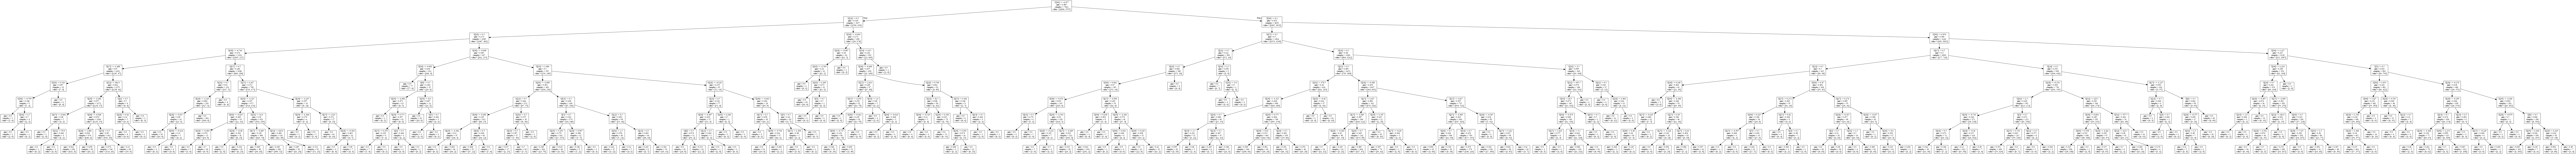

In [59]:
Image(graph.create_png())